<a href="https://colab.research.google.com/github/aksasaji/LuminarProjects/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**
**Context**

A stroke, also known as a cerebrovascular accident or CVA is when part of the brain loses its blood supply and the part of the body that the blood-deprived brain cells control stops working. This loss of blood supply can be ischemic because of lack of blood flow, or hemorrhagic because of bleeding into brain tissue. A stroke is a medical emergency because strokes can lead to death or permanent disability. There are opportunities to treat ischemic strokes but that treatment needs to be started in the first few hours after the signs of a stroke begin.

**Content**

The cerebral Stroke dataset consists of 12 features including the target column which is imbalanced.

**Importing libraries**

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


**Gettng Data**

In [204]:
df=pd.read_csv('/content/drive/MyDrive/dataset/dataset.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


**Let's see whether the data is balanced or imbalanced**

In [205]:
print(df['stroke'].value_counts())

0    42617
1      783
Name: stroke, dtype: int64


**Data is imbalanced**

**Initial Review**

In [206]:
df.shape

(43400, 12)

**Checking Missing value**

In [207]:
df.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

**bmi and smoking status have null values**

In [208]:
df.drop(columns=['smoking_status'],axis=1,inplace=True)

In [209]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

**Statistical Info of the dataset**

In [210]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.574551,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.639769,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.400000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.600000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


**Data types of the dataset**

In [211]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
stroke                 int64
dtype: object

# **Graphical Analysis**

**Heat map of correlation**

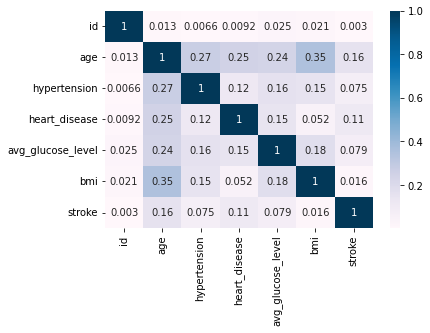

In [212]:
correlation=df.corr()
sns.heatmap(correlation,annot=True,cmap='PuBu',fmt=".2g",)
plt.show()

**Label encoding: to convert categorical values into continuous values**

In [213]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['gender','ever_married','work_type','Residence_type']
for i in list1:
  df[i]=le.fit_transform(df[i])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,0
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,0


In [214]:
X=df.iloc[:,:-1]
X

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi
0,30669,1,3.0,0,0,0,4,0,95.12,18.0
1,30468,1,58.0,1,0,1,2,1,87.96,39.2
2,16523,0,8.0,0,0,0,2,1,110.89,17.6
3,56543,0,70.0,0,0,1,2,0,69.04,35.9
4,46136,1,14.0,0,0,0,1,0,161.28,19.1
...,...,...,...,...,...,...,...,...,...,...
43395,56196,0,10.0,0,0,0,4,1,58.64,20.4
43396,5450,0,56.0,0,0,1,0,1,213.61,55.4
43397,28375,0,82.0,1,0,1,2,1,91.94,28.9
43398,27973,1,40.0,0,0,1,2,1,99.16,33.2


In [215]:
y=df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
43395    0
43396    0
43397    0
43398    0
43399    0
Name: stroke, Length: 43400, dtype: int64

**Data preprocessing using Standard Scaler**

In [216]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_sc=sc.fit_transform(X)
X_sc

array([[-0.26846865,  1.20108119, -1.74151677, ..., -1.00258398,
        -0.21717647, -1.38416136],
       [-0.27800742,  1.20108119,  0.700823  , ...,  0.99742268,
        -0.38325839,  1.39082376],
       [-0.93978947, -0.83084068, -1.51948588, ...,  0.99742268,
         0.14862128, -1.43651957],
       ...,
       [-0.37733405, -0.83084068,  1.76657127, ...,  0.99742268,
        -0.29093911,  0.04259986],
       [-0.39641159,  1.20108119, -0.0984882 , ...,  0.99742268,
        -0.12346544,  0.60545061],
       [-0.00261687, -0.83084068,  1.76657127, ...,  0.99742268,
        -0.57995877, -1.04383299]])

**Model fitting using KNN,SVM,Naive bayes**

In [217]:
#splitting Data into training and test dat
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=6,test_size=0.3)

**Naive Bayes**

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     12763
           1       0.09      0.08      0.09       257

    accuracy                           0.97     13020
   macro avg       0.54      0.53      0.53     13020
weighted avg       0.96      0.97      0.97     13020



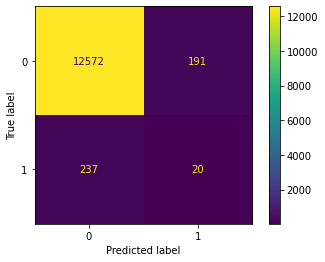

In [218]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

**KNN**

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12763
           1       0.29      0.01      0.02       257

    accuracy                           0.98     13020
   macro avg       0.63      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020



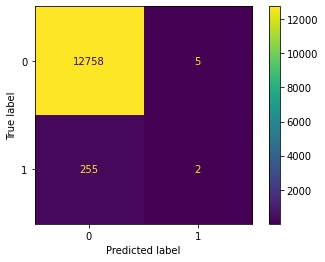

In [219]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

**SVM**

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12763
           1       0.08      0.02      0.03       257

    accuracy                           0.98     13020
   macro avg       0.53      0.51      0.51     13020
weighted avg       0.96      0.98      0.97     13020



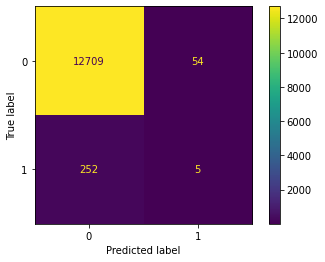

In [202]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
sv=SVC(kernel='linear')
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

**As the data is imbalance, accuracy is might not be the best option for measuring performance.
Hence if we look at F1 score and recall score, they are very low.**

**We'll use oversampling and undersampling method to handle the imbalance.**

**Oversampling using SMOTE**

In [221]:
from imblearn.over_sampling import SMOTE 
oversample=SMOTE(random_state=2)
X_os,y_os=oversample.fit_resample(X_sc,y)

In [222]:
y_os.value_counts()

0    42617
1    42617
Name: stroke, dtype: int64

In [223]:
from collections import Counter #if y_os.value_counts doesnt work
print(Counter(y))

Counter({0: 42617, 1: 783})


In [224]:
X_trainos,X_testos,y_trainos,y_testos=train_test_split(X_os,y_os,test_size=0.3,random_state=2)

**Naive Bayes**

              precision    recall  f1-score   support

           0       0.80      0.74      0.76     12928
           1       0.75      0.81      0.78     12643

    accuracy                           0.77     25571
   macro avg       0.77      0.77      0.77     25571
weighted avg       0.77      0.77      0.77     25571



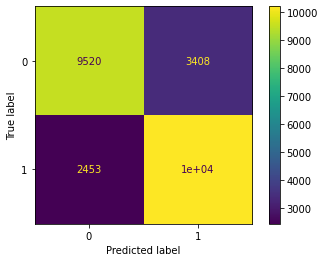

In [230]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
nb=GaussianNB()
nb.fit(X_trainos,y_trainos)
y_predos=nb.predict(X_testos)
print(classification_report(y_testos,y_predos))
print(ConfusionMatrixDisplay.from_predictions(y_testos,y_predos))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93     12928
           1       0.88      1.00      0.93     12643

    accuracy                           0.93     25571
   macro avg       0.94      0.93      0.93     25571
weighted avg       0.94      0.93      0.93     25571



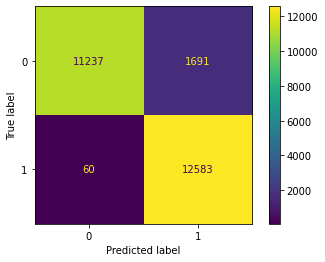

In [231]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_trainos,y_trainos)
y_predos=knn.predict(X_testos)
print(classification_report(y_testos,y_predos))
print(ConfusionMatrixDisplay.from_predictions(y_testos,y_predos))

**SVM**

              precision    recall  f1-score   support

           0       0.83      0.74      0.78     12928
           1       0.76      0.84      0.80     12643

    accuracy                           0.79     25571
   macro avg       0.79      0.79      0.79     25571
weighted avg       0.79      0.79      0.79     25571



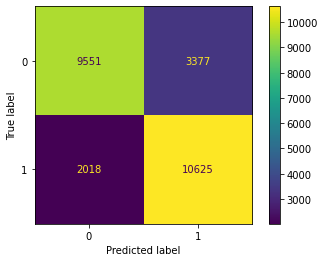

In [232]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
sv=SVC(kernel='linear')
sv.fit(X_trainos,y_trainos)
y_predos=sv.predict(X_testos)
print(classification_report(y_testos,y_predos))
print(ConfusionMatrixDisplay.from_predictions(y_testos,y_predos))

**Under Sampling using RandomUnderSampler**

In [226]:
from imblearn.under_sampling import RandomUnderSampler
undersample=RandomUnderSampler(random_state=45)
X_us,y_us=undersample.fit_resample(X_sc,y)

In [227]:
y_us.value_counts()

0    783
1    783
Name: stroke, dtype: int64

In [228]:
X_trainus,X_testus,y_trainus,y_testus=train_test_split(X_us,y_us,random_state=1,test_size=0.3)

**Naive Bayes**

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       229
           1       0.72      0.75      0.74       241

    accuracy                           0.73       470
   macro avg       0.73      0.72      0.72       470
weighted avg       0.73      0.73      0.73       470



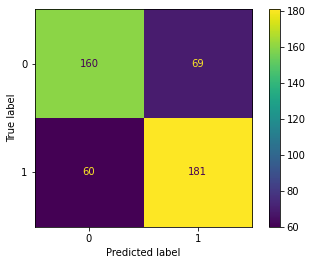

In [233]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
nb=GaussianNB()
nb.fit(X_trainus,y_trainus)
y_predus=nb.predict(X_testus)
print(classification_report(y_testus,y_predus))
print(ConfusionMatrixDisplay.from_predictions(y_testus,y_predus))

**KNN**

              precision    recall  f1-score   support

           0       0.71      0.66      0.68       229
           1       0.69      0.75      0.72       241

    accuracy                           0.70       470
   macro avg       0.70      0.70      0.70       470
weighted avg       0.70      0.70      0.70       470



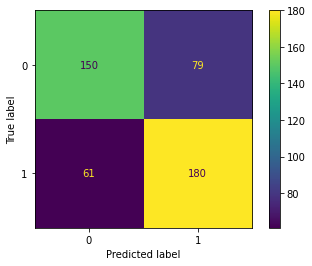

In [234]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_trainus,y_trainus)
y_predus=knn.predict(X_testus)
print(classification_report(y_testus,y_predus))
print(ConfusionMatrixDisplay.from_predictions(y_testus,y_predus))

**SVM**

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       229
           1       0.73      0.79      0.76       241

    accuracy                           0.74       470
   macro avg       0.74      0.74      0.74       470
weighted avg       0.74      0.74      0.74       470



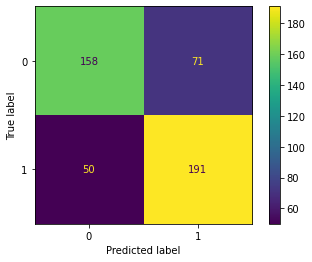

In [235]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
sv=SVC(kernel='linear')
sv.fit(X_trainus,y_trainus)
y_predus=sv.predict(X_testus)
print(classification_report(y_testus,y_predus))
print(ConfusionMatrixDisplay.from_predictions(y_testus,y_predus))